# **VISUALIZACIÓN DE DATOS**


**TRABAJO PRÁCTICO**: LIFESTYLE AND WELLBEING DATA.

**Alumno/a: Cristina González Celada**

• Obtención de mapa de calor de los atributos de la base de datos:

In [ ]:
#Importación de librerías necesarias:
import io
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from google.colab import files

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
#Definiendo una función que permita cargar los datos desde una ubicación seleccionada:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('UTF-8')),delimiter=';')
    return df
df = upload_files()
#Muestra del dataset:
df.head()

Saving 2016-2020.csv to 2016-2020.csv
User uploaded file "2016-2020.csv" with length 1096145 bytes


,Timestamp,YEAR,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,01/01/2016,2016,5,4,10,3,2,2,1,3,...,9,0,7,2,4,5,1,21 to 35,Female,641.8
1,01/01/2016,2016,3,3,1,10,0,4,4,1,...,10,1,5,1,5,1,10,Less than 20,Female,628.1
2,01/01/2016,2016,2,4,5,10,10,10,2,1,...,6,0,4,1,10,6,7,36 to 50,Female,649.7
3,01/01/2016,2016,3,4,10,7,2,10,1,3,...,8,10,3,2,3,1,7,21 to 35,Male,637.1
4,01/01/2016,2016,0,4,5,3,0,4,3,0,...,8,10,9,1,6,1,3,21 to 35,Male,546.2


In [ ]:
#Dimensiones de la base de datos = (filas, columnas) = (instancias, variables):
df.shape

(13587, 25)

In [ ]:
#Variables: 25 en total.
variables = df.columns
variables

Index(['Timestamp', 'YEAR', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [ ]:
#Variables numéricas: 22 de 25.
df_numeric = df.select_dtypes(include=[np.number])
variables_num = df_numeric.columns.values
variables_num

array(['YEAR', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
       'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW',
       'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION',
       'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE'],
      dtype=object)

In [ ]:
#Tipología de datos:
df.dtypes

Timestamp                   object
YEAR                         int64
FRUITS_VEGGIES               int64
DAILY_STRESS                 int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

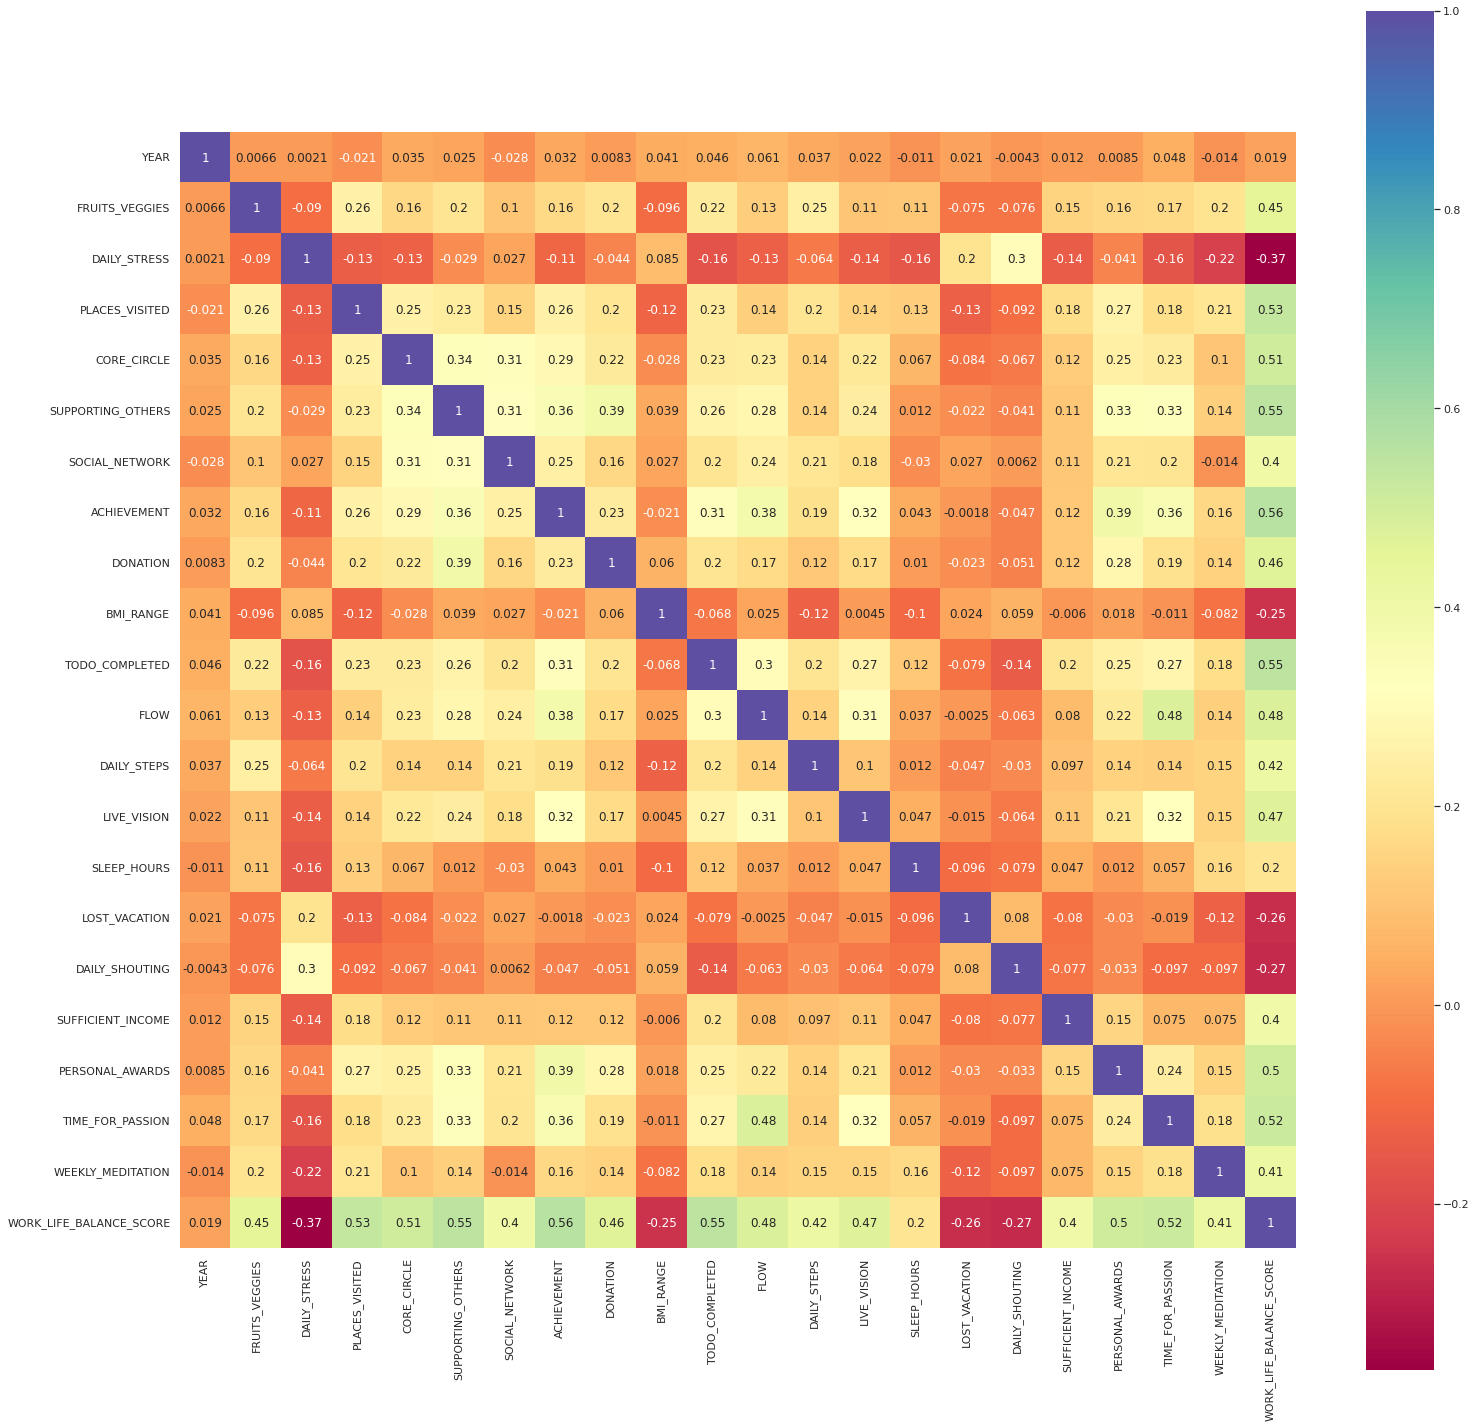

In [ ]:
#Matriz de correlación de las variables numéricas (para ver cuáles de ellas están fuertemente relacionadas):
sns.set()
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), square=True, annot=True, cmap = 'Spectral')

• Obtención de mapas de calor "personalizados" (con atributos específicos):

In [ ]:
#Variables seleccionadas:
columnas = ['YEAR', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'SOCIAL_NETWORK','ACHIEVEMENT', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW',
            'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE']

In [ ]:
#Dataframe con variables seleccionadas:
sub_df = pd.DataFrame(data = df, columns = columnas)
sub_df.head()

,YEAR,FRUITS_VEGGIES,DAILY_STRESS,SOCIAL_NETWORK,ACHIEVEMENT,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,DAILY_SHOUTING,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
0,2016,5,4,2,1,1,3,1,3,1,9,7,2,5,1,641.8
1,2016,3,3,4,4,2,3,2,10,1,10,5,1,1,10,628.1
2,2016,2,4,10,2,2,7,1,3,0,6,4,1,6,7,649.7
3,2016,3,4,10,1,2,2,3,6,2,8,3,2,1,7,637.1
4,2016,0,4,4,3,2,0,2,2,0,8,9,1,1,3,546.2


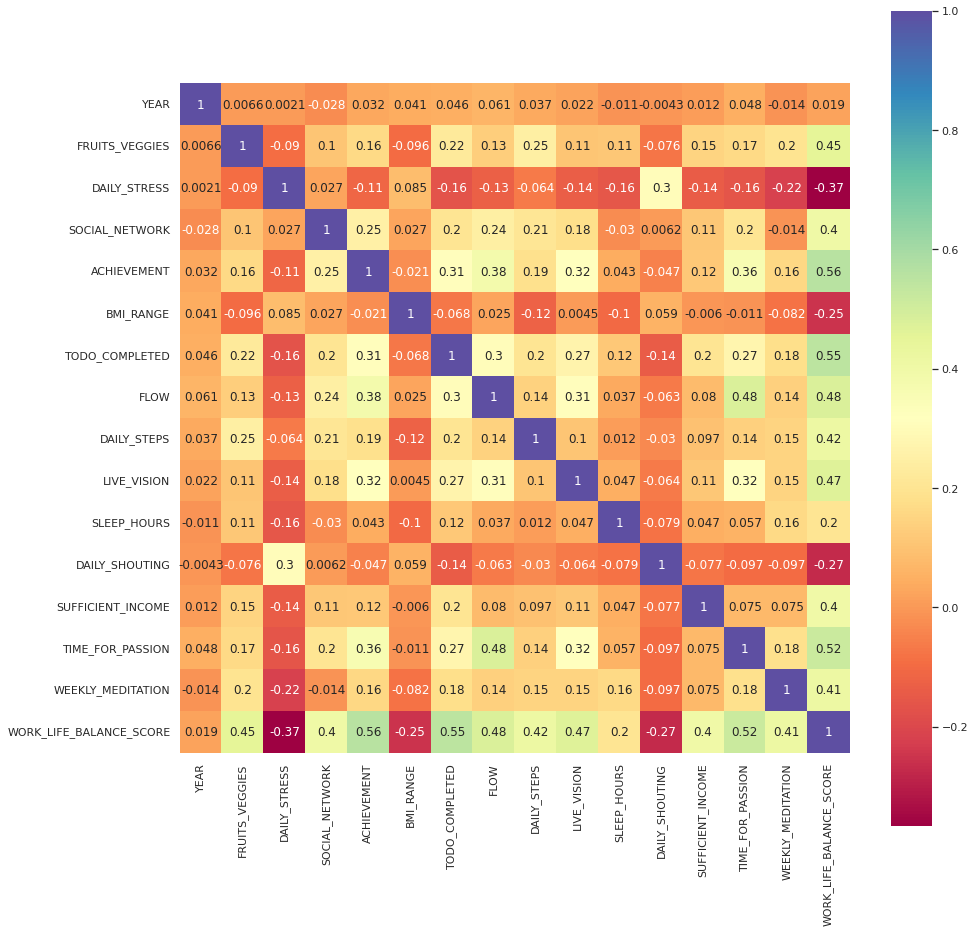

In [ ]:
#Matriz de correlación:
sns.set()
plt.figure(figsize=(15, 15))
sns.heatmap(sub_df.corr(), square=True, annot=True, cmap = 'Spectral')

In [ ]:
#Variables seleccionadas excluyendo WORK_LIFE_BALANCE_SCORE:
columnas2 = ['YEAR', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'SOCIAL_NETWORK','ACHIEVEMENT', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW',
            'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION']

In [ ]:
#Dataframe con variables seleccionadas excluyendo WORK_LIFE_BALANCE_SCORE:
sub_df2 = pd.DataFrame(data = df, columns = columnas2)
sub_df2.head()

,YEAR,FRUITS_VEGGIES,DAILY_STRESS,SOCIAL_NETWORK,ACHIEVEMENT,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,DAILY_SHOUTING,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION
0,2016,5,4,2,1,1,3,1,3,1,9,7,2,5,1
1,2016,3,3,4,4,2,3,2,10,1,10,5,1,1,10
2,2016,2,4,10,2,2,7,1,3,0,6,4,1,6,7
3,2016,3,4,10,1,2,2,3,6,2,8,3,2,1,7
4,2016,0,4,4,3,2,0,2,2,0,8,9,1,1,3


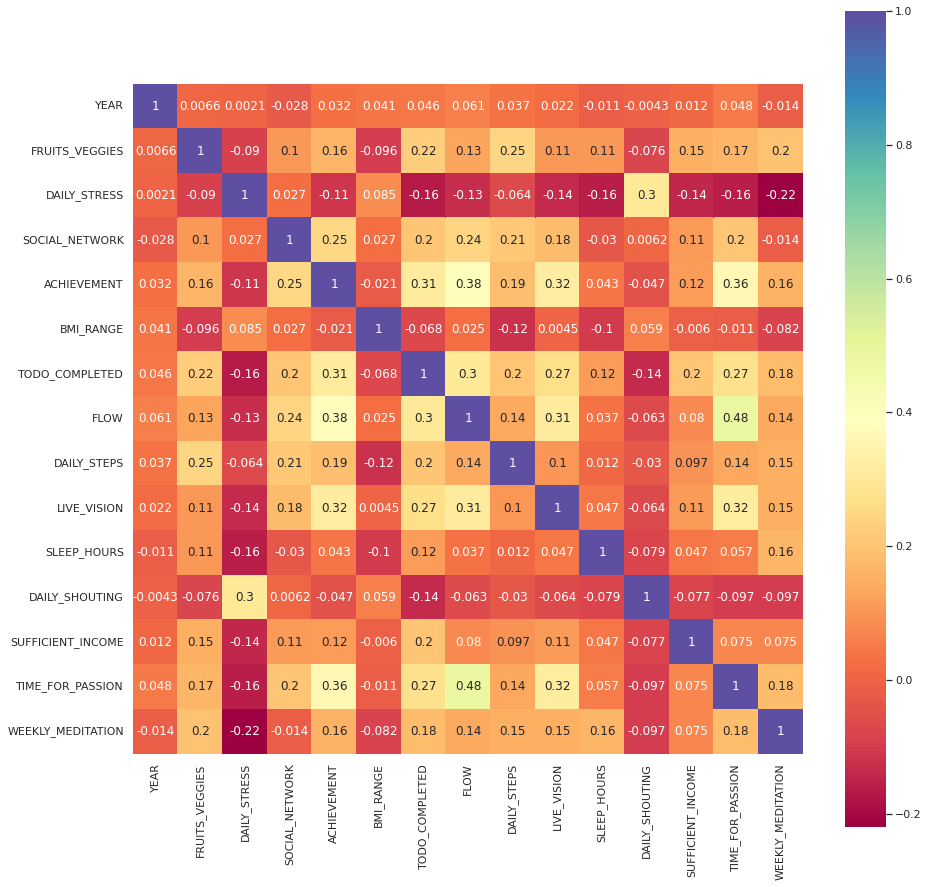

In [ ]:
#Matriz de correlación:
sns.set()
plt.figure(figsize=(15, 15))
sns.heatmap(sub_df2.corr(), square=True, annot=True, cmap = 'Spectral')